<a href="https://colab.research.google.com/github/aswinina/Meachine-Learing-project/blob/main/Aswini_s%26p500_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler

In [35]:
# Load your S&P 500 stock data
data = pd.read_csv('/content/drive/MyDrive/all_stocks_5yr.csv')  # Replace 'your_data.csv' with your file name
data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [3]:
# Explore the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB
None


In [36]:
data['date'] = pd.to_datetime(data['date'])
data['Name'] =data['Name'].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  string        
dtypes: datetime64[ns](1), float64(4), int64(1), string(1)
memory usage: 33.1 MB


In [37]:
# Handling Missing Values (if any)
data.dropna(inplace=True)  # Remove rows with missing values


In [59]:
data['Target'] = (data['close'].shift(-1) > data['close']).astype(int)

1    322591
0    296438
Name: Target, dtype: int64


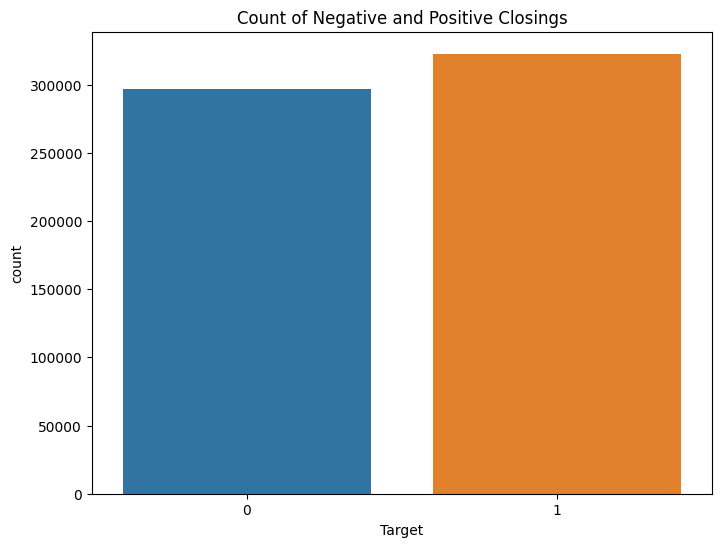

In [39]:
# Counting values in the 'Target' column
print(data['Target'].value_counts())

# Plotting count of positive and negative closing
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data)
plt.title('Count of Negative and Positive Closings')
plt.show()


**Data Preprocessing:**

In [43]:

# Splitting the data into features and labels
X = data[['close', 'volume', 'open', 'high', 'low']]  # Features
y = data['Target']

,Target,volume,open,high,low
Target,1.000000,-0.002908,0.000400,0.000262,0.000285
volume,-0.002908,1.000000,-0.142693,-0.142303,-0.143227
open,0.000400,-0.142693,1.000000,0.999939,0.999928
high,0.000262,-0.142303,0.999939,1.000000,0.999903
low,0.000285,-0.143227,0.999928,0.999903,1.000000


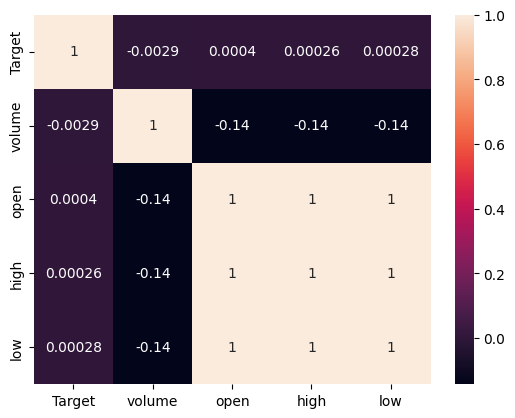

In [44]:
#__________Best Features________________
data = data.filter(items=['Target', 'volume', 'open', 'high', 'low'])

CM = data.corr()
#threshold = 0.6

#features_names = list(CM.columns[np.abs(CM['target'])>=threshold])
#features = CM.loc[:, features_names].loc[features_names, :]

sns.heatmap(CM, annot=True)#
CM

In [45]:
# Normalization/Scaling (optional, but can be beneficial for some models)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Example model (replace as needed)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train your model (example: Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.5219705659036203

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.02     59171
           1       0.52      0.99      0.68     64631

    accuracy                           0.52    123802
   macro avg       0.51      0.50      0.35    123802
weighted avg       0.51      0.52      0.37    123802


Confusion Matrix:
 [[  593 58578]
 [  603 64028]]


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define hyperparameters and their distributions to sample from
param_dist = {
    'C': uniform(0.1, 10),  # distribution for Logistic Regression regularization parameter
    'solver': ['liblinear', 'saga'] # solvers for Logistic Regression
}

# Initialize the model
model = LogisticRegression()

# Perform random search
random_search = RandomizedSearchCV(model, param_dist, cv=5, n_iter=10, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Retrain the best model using the entire training set (optional)
best_model.fit(X_train, y_train)


LogisticRegression(C=1.3095817399240473, solver='liblinear')

In [48]:

# Use the best model to predict on the test set
test_predictions = best_model.predict(X_test)

# Evaluate the model performance on the test set
print("Accuracy on Test Set:", accuracy_score(y_test, test_predictions))
# Add more evaluation metrics if needed


Accuracy on Test Set: 0.5219705659036203


In [50]:
data = pd.read_csv('/content/drive/MyDrive/all_stocks_5yr.csv')
# Assuming 'data' is your DataFrame containing stock data
# Create a 50-day moving average
data['MA_50'] = data['close'].rolling(window=50).mean()

# Create a 200-day moving average
data['MA_200'] = data['close'].rolling(window=200).mean()


In [51]:
# Calculate RSI
delta = data['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))


In [52]:
data.head()

,date,open,high,low,close,volume,Name,MA_50,MA_200,RSI
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN,NaN,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,NaN,NaN,NaN
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,NaN,NaN,NaN
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,NaN,NaN,NaN
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,NaN,NaN,NaN


In [53]:
data.dropna(inplace=True)


In [54]:
data['MA_50'].fillna(0, inplace=True)
data['MA_200'].fillna(0, inplace=True)
data['RSI'].fillna(0, inplace=True)


In [55]:
data['MA_50'].fillna(method='ffill', inplace=True)
data['MA_200'].fillna(method='ffill', inplace=True)
data['RSI'].fillna(method='ffill', inplace=True)


In [72]:
 data['MA_50'].interpolate(method='linear', inplace=True)
 data['MA_200'].interpolate(method='linear', inplace=True)
 data['RSI'].interpolate(method='linear', inplace=True)


In [75]:
data_df = data

In [76]:
data_df

,date,open,high,low,close,volume,Name,MA_50,MA_200,RSI,...,volume_lag_2,close_lag_3,volume_lag_3,close_lag_4,volume_lag_4,close_lag_5,volume_lag_5,rolling_mean_close,rolling_std_close,Target
294,2014-04-10,36.70,37.38,34.60,35.2900,16312604,AAL,36.264298,25.149649,46.507666,...,17409958.0,35.7800,10577786.0,36.56,8733197.0,37.34,7939297.0,36.690000,0.810555,0
295,2014-04-11,34.10,35.46,33.59,33.6799,15538291,AAL,36.261896,25.237199,37.677428,...,11479241.0,35.9800,17409958.0,35.78,10577786.0,36.56,8733197.0,36.556995,1.053001,0
296,2014-04-14,34.00,34.77,32.77,33.3700,13466805,AAL,36.258296,25.322499,30.918281,...,16312604.0,36.9000,11479241.0,35.98,17409958.0,35.78,10577786.0,36.340495,1.235025,1
297,2014-04-15,33.52,34.33,31.86,33.7200,15981721,AAL,36.253496,25.408999,36.479129,...,15538291.0,35.2900,16312604.0,36.90,11479241.0,35.98,17409958.0,36.158995,1.341042,1
298,2014-04-16,34.17,35.59,33.94,35.5100,15636133,AAL,36.282696,25.502549,48.905724,...,13466805.0,33.6799,15538291.0,35.29,16312604.0,36.90,11479241.0,36.080495,1.330199,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.8200,2982259,ZTS,73.699400,65.418600,64.912281,...,3808707.0,79.1800,2662383.0,80.09,2532808.0,79.25,2327262.0,76.460500,2.097659,0
619036,2018-02-02,77.53,78.12,76.73,76.7800,2595187,ZTS,73.816000,65.533250,56.278229,...,4136360.0,78.3500,3808707.0,79.18,2662383.0,80.09,2532808.0,76.673000,1.882795,0
619037,2018-02-05,76.64,76.92,73.18,73.8300,2962031,ZTS,73.865400,65.630950,43.835616,...,2982259.0,76.7300,4136360.0,78.35,3808707.0,79.18,2662383.0,76.696500,1.841753,0
619038,2018-02-06,72.74,74.56,72.13,73.2700,4924323,ZTS,73.909400,65.726350,36.742424,...,2595187.0,77.8200,2982259.0,76.73,4136360.0,78.35,3808707.0,76.648000,1.920917,1


In [24]:

from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=5)  # Example with setting maximum depth

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = dt_classifier.predict(X_test)


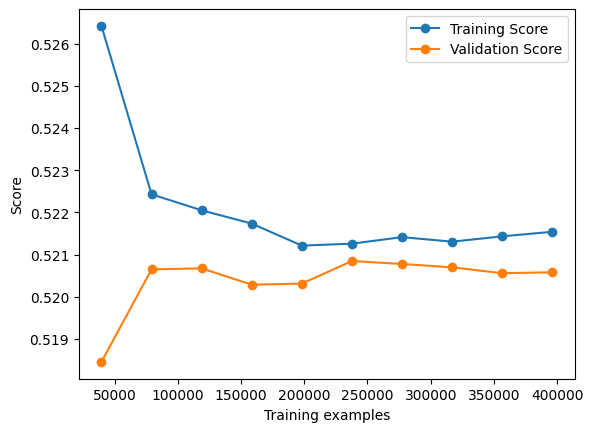

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    dt_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.show()



In [ ]:
from sklearn.ensemble import BaggingClassifier

# Initialize base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier()

# Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Predictions using Bagging Classifier
bagging_predictions = bagging_model.predict(X_test)

# Evaluate accuracy
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging Classifier Accuracy:", bagging_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Accuracy: 0.49920843900941797


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=1)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Predictions using AdaBoost Classifier
adaboost_predictions = adaboost_model.predict(X_test)

# Evaluate accuracy
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Classifier Accuracy:", adaboost_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Classifier Accuracy: 0.5219779332180993


**Model Selection and Optimization:**

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters grid for Random Forest with reduced ranges
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3]
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Perform Grid Search with reduced parameter ranges
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4], 'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})

In [27]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
best_params, best_rf_model

 **Model Evaluation and Metrics:**

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions using the best model
test_predictions = best_rf_model.predict(X_test)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on Test Set:", accuracy)

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, test_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, test_predictions))


Accuracy on Test Set: 0.5221717848892622

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.00      0.00     59169
           1       0.52      1.00      0.69     64637

    accuracy                           0.52    123806
   macro avg       0.52      0.50      0.34    123806
weighted avg       0.52      0.52      0.36    123806


Confusion Matrix:
 [[  126 59043]
 [  115 64522]]


**Feature Importance Analysis:**

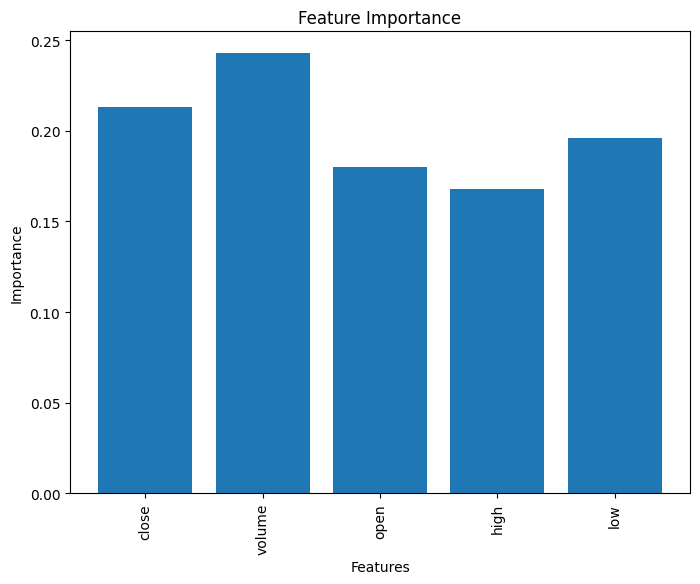

In [29]:
# Assess feature importance if using Random Forest
feature_importance = best_rf_model.feature_importances_

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


In [100]:
import xgboost as xgb

# Create lag features
for lag in range(1, 6):
    data[f'close_lag_{lag}'] = data['close'].shift(lag)
    data[f'volume_lag_{lag}'] = data['volume'].shift(lag)


# Create rolling statistics features
data['rolling_mean_close'] = data['close'].rolling(window=20).mean()
data['rolling_std_close'] = data['close'].rolling(window=20).std()


# Drop rows with NaN values created by lag and rolling operations
data.dropna(inplace=True)

# Define features and target
features = [col for col in data.columns if col not in ['Target']]
X = data_df[features]
y = data_df['Target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [101]:
# Exclude non-numeric or non-boolean columns explicitly
non_numeric_columns = ['date', 'Name']  # Update with non-numeric column names

# Filter numeric or boolean columns
numeric_columns = [col for col in x_train.columns if col not in non_numeric_columns]

# Retain only numeric or boolean columns
x_train = x_train[numeric_columns]
x_test = x_test[numeric_columns]

# Train the model
xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [102]:
# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions
predictions = xgb_model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5222477323804751
